2/2 [==============================] - 0s 4ms/step
Epoch 0 - D Loss: 0.7823027968406677, D Acc: 47.65625% - G Loss: 1.282118320465088
1/1 [==============================] - 0s 110ms/step


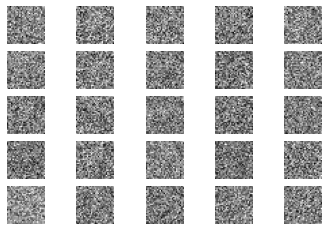

2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step
Epoch 500 - D Loss: 0.6080726385116577, D Acc: 72.65625% - G Loss: 1.3142814636230469
1/1 [==============================] - 0s 26ms/step


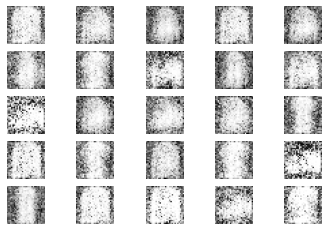

2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 9ms/step
Epoch 1000 - D Loss: 0.6936569213867188, D Acc: 54.6875% - G Loss: 0.8236579298973083
1/1 [==============================] - 0s 34ms/step


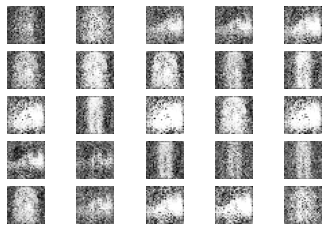

2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step
Epoch 1500 - D Loss: 0.6684659719467163, D Acc: 54.6875% - G Loss: 0.7787445187568665
1/1 [==============================] - 0s 23ms/step


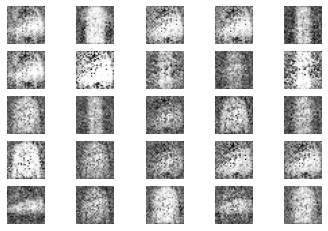

2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step
Epoch 2000 - D Loss: 0.4030834436416626, D Acc: 86.71875% - G Loss: 1.947096824645996
1/1 [==============================] - 0s 26ms/step


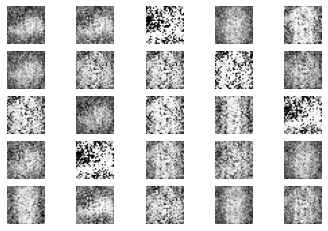

2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step
Epoch 2500 - D Loss: 0.42913077771663666, D Acc: 80.46875% - G Loss: 2.6187121868133545
1/1 [==============================] - 0s 24ms/step


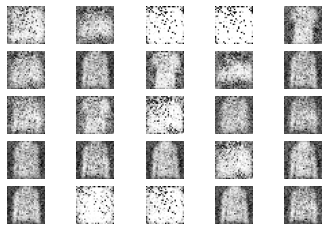

2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step
Epoch 3000 - D Loss: 0.3371874541044235, D Acc: 89.84375% - G Loss: 3.576812744140625
1/1 [==============================] - 0s 26ms/step


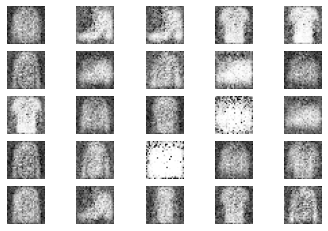

2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step
Epoch 3500 - D Loss: 0.3884788453578949, D Acc: 86.71875% - G Loss: 2.1007614135742188
1/1 [==============================] - 0s 24ms/step


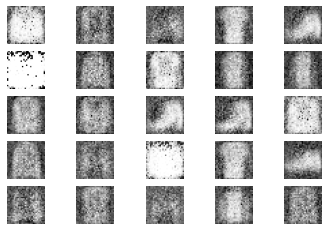

2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step
Epoch 4000 - D Loss: 0.42099229991436005, D Acc: 85.15625% - G Loss: 1.4787901639938354
1/1 [==============================] - 0s 24ms/step


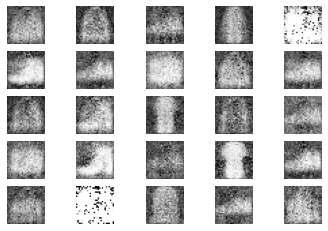

2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step
Epoch 4500 - D Loss: 0.4130896180868149, D Acc: 83.59375% - G Loss: 2.1712632179260254
1/1 [==============================] - 0s 26ms/step


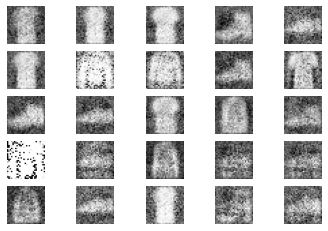

2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
import numpy as np
import matplotlib.pyplot as plt

# Завантаження датасету Fashion MNIST
(x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0  # Нормалізація даних
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Додавання каналу

# Гіперпараметри
latent_dim = 100
img_shape = (28, 28, 1)
epochs = 5000
batch_size = 64
sample_interval = 500

# Модель генератора
def build_generator():
    model = Sequential()

    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    return model

# Модель дискримінатора
def build_discriminator():
    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    return model

# Побудова GAN
optimizer = Adam(0.0002, 0.5)


discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


generator = build_generator()


discriminator.trainable = False

gan_input = tf.keras.Input(shape=(latent_dim,))
img = generator(gan_input)
valid = discriminator(img)

combined = tf.keras.Model(gan_input, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

# Навчання GAN
def train(epochs, batch_size, sample_interval):
    
    # Мітки для навчання
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):

        # Навчання дискримінатора
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Навчання генератора
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = combined.train_on_batch(noise, valid)

        # Вивід результатів
        if epoch % sample_interval == 0:
            print(f"Epoch {epoch} - D Loss: {d_loss[0]}, D Acc: {100 * d_loss[1]}% - G Loss: {g_loss}")
            sample_images(epoch)


def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()


train(epochs, batch_size, sample_interval)

Epoch 4500 - D Loss: 0.4130896180868149, D Acc: 83.59375% - G Loss: 2.1712632179260254